In [2]:
import pandas as pd

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_excel("BDVigas_Paper.xlsx",sheet_name="Sheet1")
df

,b (mm),fc (MPa),Mu (Kn.m),p_opt,R_opt,d_opt (cm),As (cm^2)
0,200,21,100,0.009954,0.523773,39.039718,7.771727
1,200,21,100,0.009954,0.523773,39.039718,7.771727
2,200,21,100,0.009954,0.523773,39.039718,7.771727
3,200,21,100,0.009954,0.523773,39.039718,7.771727
4,200,21,100,0.009954,0.523773,39.039718,7.771727
...,...,...,...,...,...,...,...
35995,400,35,2000,0.010966,0.488321,115.098414,50.488020
35996,400,35,2000,0.010966,0.488321,115.098414,50.488020
35997,400,35,2000,0.010966,0.488321,115.098414,50.488020
35998,400,35,2000,0.010966,0.488321,115.098414,50.488020


In [5]:
y = df["d_opt (cm)"]
x = df[["b (mm)", "fc (MPa)","Mu (Kn.m)"]]

In [6]:
y

0         39.039718
1         39.039718
2         39.039718
3         39.039718
4         39.039718
            ...    
35995    115.098414
35996    115.098414
35997    115.098414
35998    115.098414
35999    115.098414
Name: d_opt (cm), Length: 36000, dtype: float64

In [7]:
x

,b (mm),fc (MPa),Mu (Kn.m)
0,200,21,100
1,200,21,100
2,200,21,100
3,200,21,100
4,200,21,100
...,...,...,...
35995,400,35,2000
35996,400,35,2000
35997,400,35,2000
35998,400,35,2000


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=5)

In [10]:
xtrain

,b (mm),fc (MPa),Mu (Kn.m)
17577,300,28,1000
13240,275,28,800
19701,300,28,1100
14145,275,28,800
29,200,21,100
...,...,...,...
5520,225,21,400
35814,400,35,2000
20463,325,28,1200
18638,300,28,1100


In [11]:
ytrain

17577     96.570776
13240     90.216297
19701    101.284284
14145     90.216297
29        39.039718
            ...    
5520      73.613997
35814    115.098414
20463    101.637808
18638    101.284284
35683    115.098414
Name: d_opt (cm), Length: 28800, dtype: float64

In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense( 40, activation = "relu", input_shape=(xtrain.shape[1],) ),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 1 )
])

c:\Users\josga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,761 (26.41 KB)

 Trainable params: 6,761 (26.41 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
def RMSE(y_true,y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [16]:
# Compilar el modelo
model.compile(optimizer="adam",
    loss=RMSE
)

In [17]:
# Entrenando el modelo
model.fit(xtrain, ytrain, epochs = 20, verbose = True)

Epoch 1/20


900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.8600
Epoch 2/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 4.5792
Epoch 3/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 4.7095
Epoch 4/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.3436
Epoch 5/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4.1557
Epoch 6/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 4.0623
Epoch 7/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3.9728
Epoch 8/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.9064
Epoch 9/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.7613
Epoch 10/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.6834
Epoch 11/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.5001
Epoch 12/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.4440
Epoch 13/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 3.2309
Epoch 14/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 3.1079
Epoch 15/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - los

<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
C:\Users\josga\AppData\Local\Temp\ipykernel_12200\3862436508.py:25: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)


900/900 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
MSE: 7.4948638603140045
RMSE: 2.737674900406183


Text(0.5, 1.0, 'Peralte óptimo para una viga simplemente reforzada de Concreto Armado')

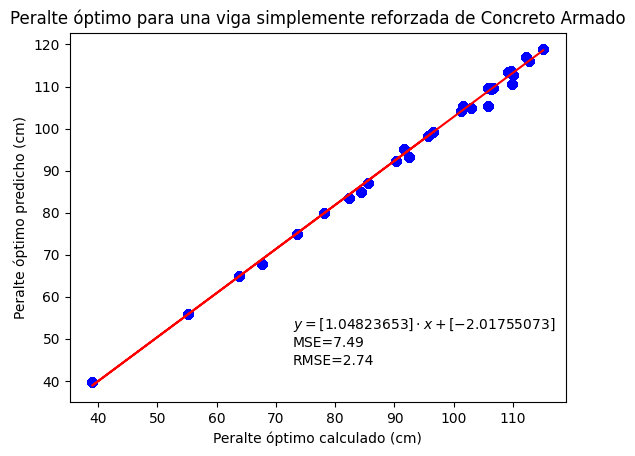

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Calculamos las predicciones del modelo
y_pred = model.predict(xtrain)

# Calculamos el MSE
mse = mean_squared_error(ytrain, y_pred)
print("MSE:", mse)

# Calculamos el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain, y_pred, 1)

# Ploteo de resultados
plt.scatter(ytrain, y_pred, color='blue')
plt.plot(ytrain, m*ytrain + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'MSE={mse:.2f}', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.1, f'RMSE={rmse:.2f}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel("Peralte óptimo calculado (cm)")
plt.ylabel("Peralte óptimo predicho (cm)")
plt.title("Peralte óptimo para una viga simplemente reforzada de Concreto Armado")

In [19]:
#Datos de ETABS
b = [400] #Base de la Viga (mm)
fc = [35] #Resistencia a la compresión del concreto (MPa)
Mu = [1900] #Momento Último (kN.m)

#Almacenamiento de datos del ETABS
data_Etabs = pd.DataFrame()
data_Etabs['b (mm)'] = b
data_Etabs['fc (MPa)'] = fc
data_Etabs['Mu (Kn.m)'] = Mu

#Evaluación en el Modelo entrenado por ANN
y_d = model.predict(data_Etabs)

imprimir = f"El peralte efectivo (d) es {y_d} cm"
print(imprimir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
El peralte efectivo (d) es [[116.95574]] cm
